In [1]:
.libPaths("/pkg/R-4.1.0-0/lib/R/library")

In [3]:
library(MASS)
library(viridis)
library(ggplot2)
library(gridExtra)  ## for grid.arrange()
library(tidyverse)
library(RColorBrewer)
library("readxl")


Warning message:
“Removed 50 rows containing non-finite values (stat_density2d_filled).”
Warning message:
“Removed 17 rows containing missing values (geom_point).”


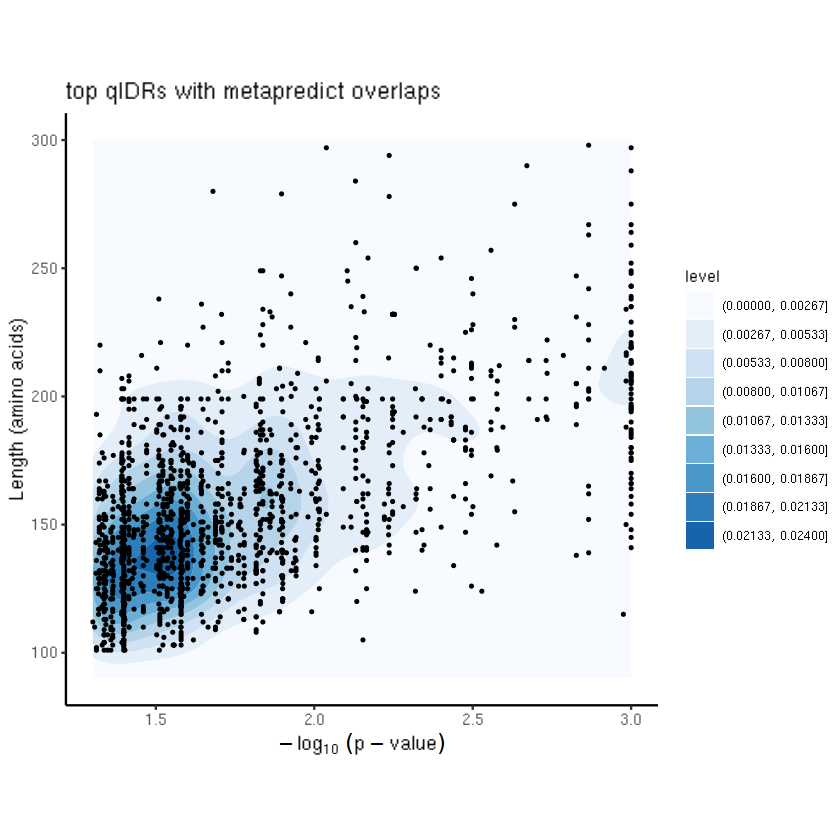

In [6]:
my_data_metapredict <- read_excel("../MasterTable_canonicalHuman_qIDR.xlsx")

thre=0.001


## 1) top qIDRs
my_data_metapredict_top=my_data_metapredict[my_data_metapredict$`min(p-val)`< 0.05, ]
my_data_metapredict_top$`min(p-val)`[which(my_data_metapredict_top$`min(p-val)`< thre)]=thre

highlight_df_3 <- my_data_metapredict_top %>% 
  filter(my_data_metapredict_top$overlap_metapredict  =="yes" )

blues <- brewer.pal(9, "Blues")
blue_range <- colorRampPalette(blues)

ratio <- with(my_data_metapredict_top, diff(range(-log10(`min(p-val)`)))/diff(c(90,300)))
ggplot(my_data_metapredict_top, aes(x=-log10(`min(p-val)`), y= `length_IDR(qIDR)`) ) + 
  geom_density2d_filled(bins=9) + geom_point(data=highlight_df_3,  aes(x=-log10(`min(p-val)`),y=`length_IDR(qIDR)`), 
                                             color='black', size=0.4)+ theme_classic() +ylim(90,300)+scale_fill_manual(values = blue_range(11))+ggtitle("top qIDRs with metapredict overlaps")+ coord_fixed(ratio=ratio)+theme(legend.title = element_text( size=9), legend.text=element_text(size=7))+xlab(expression(-log[10]~(p-value)))+ylab("Length (amino acids)") # for the x axis label


In [7]:




my_data_all_qIDRs=my_data_metapredict  
my_data_all_qIDRs$`min(p-val)`[which(my_data_all_qIDRs$`min(p-val)`< thre)]=thre


keys <- read.csv(file = '../HG38_pep/HG30_pep_annotation.csv')
TFnames <- read.table("../TFs/TF_IDs.txt",header = F)
PLDs <- read.table("../PLAAC/PLD_IDs.txt",header = F)
Pld_99 <- read_excel("../PLAAC/PLD_99p.xlsx")

#convert PLD keys to match
PLD_keys=keys$gene_symbol[match(PLDs$V1, keys$ID )]


highlight_df_TFs <- my_data_all_qIDRs %>% 
  filter(my_data_all_qIDRs$gene_symbol  %in% TFnames$V1 )


highlight_df_PLDs <- my_data_all_qIDRs %>% 
  filter(my_data_all_qIDRs$gene_symbol  %in% PLD_keys )


highlight_df_PLDs99 <- my_data_all_qIDRs %>% 
  filter(my_data_all_qIDRs$gene_symbol  %in% Pld_99$Name )



Warning message:
“Removed 50 rows containing non-finite values (stat_density2d_filled).”


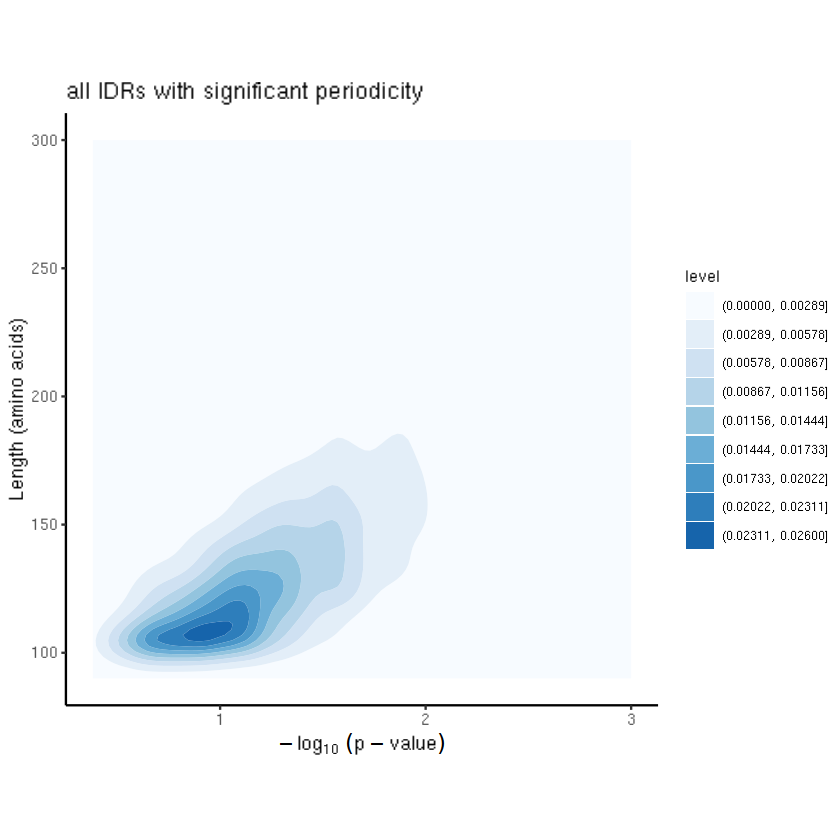

In [8]:
##2)all qIDRs  

ratio <- with(my_data_all_qIDRs, diff(range(-log10(`min(p-val)`)))/diff(c(90,300)))

##all qIDRs density
ggplot(my_data_all_qIDRs, aes(x=-log10(`min(p-val)`), y= `length_IDR(qIDR)`) ) + 
  geom_density2d_filled(bins=9) +ylim(90,300)+scale_fill_manual(values = blue_range(11))+ theme_classic()+ggtitle("all IDRs with significant periodicity")+ coord_fixed(ratio=ratio)+theme(legend.title = element_text( size=9), legend.text=element_text(size=7))+xlab(expression(-log[10]~(p-value)))+ylab("Length (amino acids)") # for the x axis label


Warning message:
“Removed 3 rows containing non-finite values (stat_density2d_filled).”


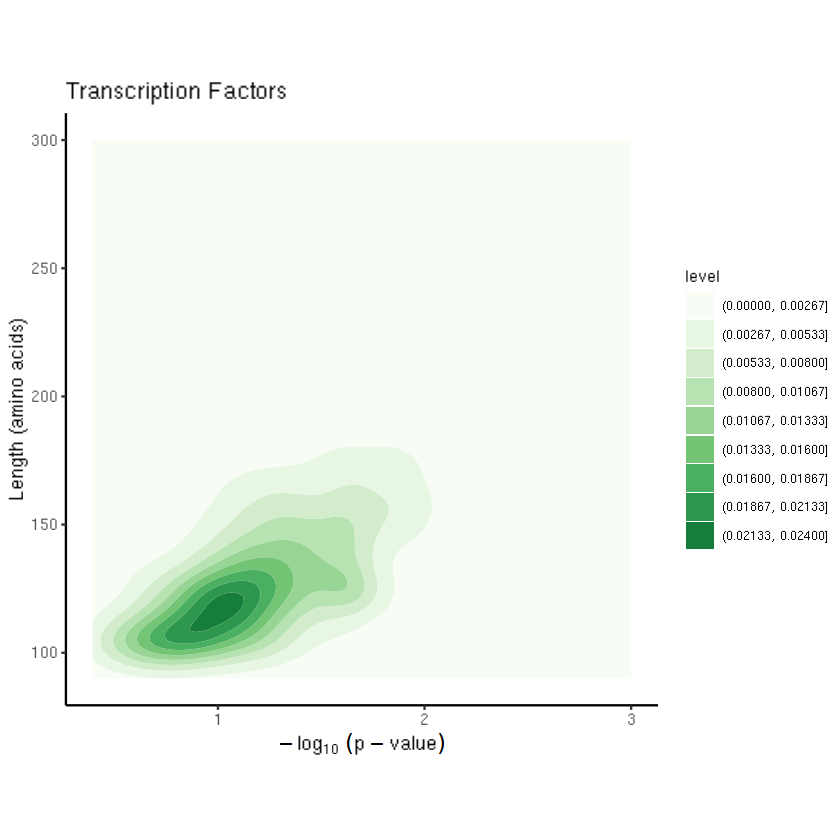

In [9]:


greens <- brewer.pal(9, "Greens")
greens_range <- colorRampPalette(greens)

ratio <- with(highlight_df_TFs, diff(range(-log10(`min(p-val)`)))/diff(c(90,300)))

ggplot(highlight_df_TFs, aes(x=-log10(`min(p-val)`), y= `length_IDR(qIDR)`) ) + 
  geom_density2d_filled(bins=9) + theme_classic() +ylim(90,300)+scale_fill_manual(values = greens_range(11))+ggtitle("Transcription Factors")+ coord_fixed(ratio=ratio)+theme(legend.title = element_text( size=9), legend.text=element_text(size=7))+xlab(expression(-log[10]~(p-value)))+ylab("Length (amino acids)") # for the x axis label




Warning message:
“Removed 10 rows containing non-finite values (stat_density2d_filled).”


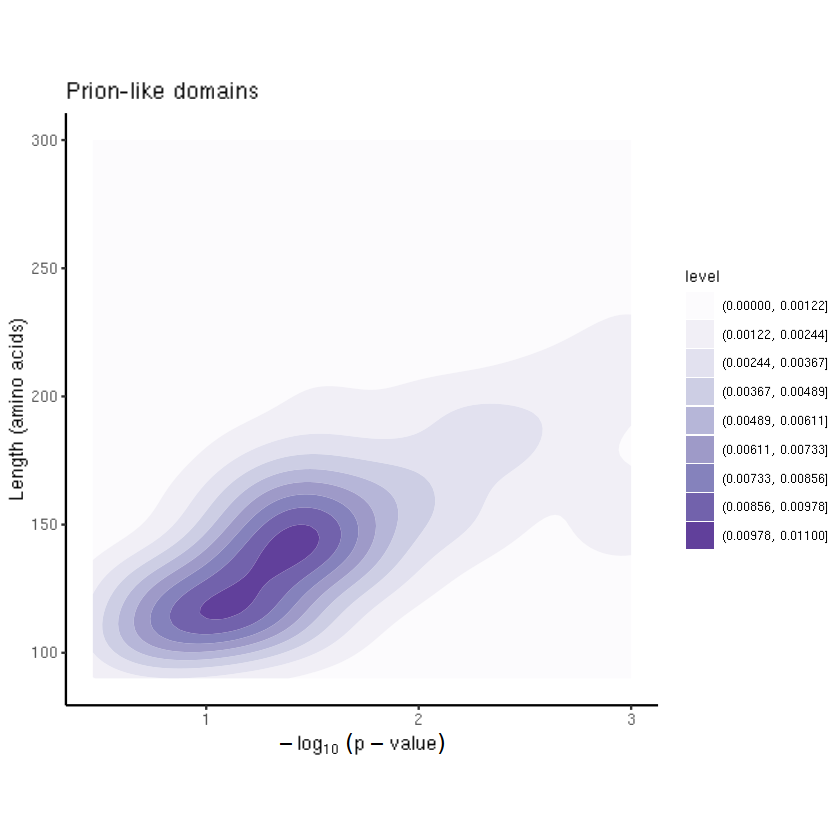

In [10]:


purples <- brewer.pal(9, "Purples")
purple_range <- colorRampPalette(purples)

ratio <- with(highlight_df_PLDs, diff(range(-log10(`min(p-val)`)))/diff(c(90,300)))


ggplot(highlight_df_PLDs, aes(x=-log10(`min(p-val)`), y= `length_IDR(qIDR)`) ) + 
  geom_density2d_filled(bins=9) + theme_classic() +ylim(90,300)+scale_fill_manual(values = purple_range(11))+ggtitle("Prion-like domains")+ coord_fixed(ratio=ratio)+theme(legend.title = element_text( size=9), legend.text=element_text(size=7))+xlab(expression(-log[10]~(p-value)))+ylab("Length (amino acids)") # for the x axis label





Warning message:
“Removed 6 rows containing non-finite values (stat_density2d_filled).”


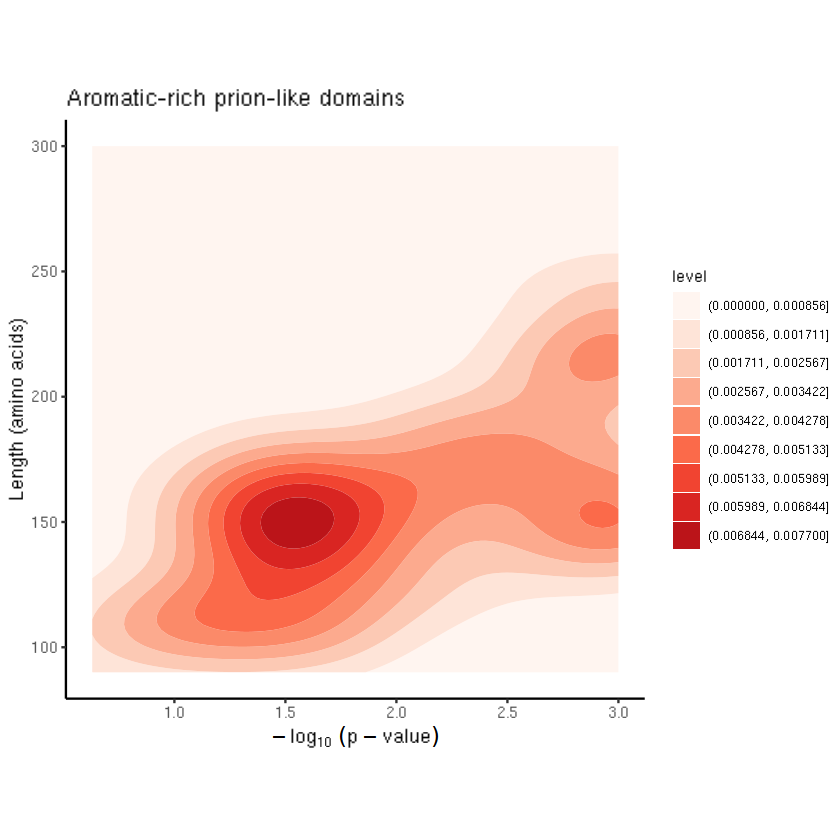

In [11]:

reds <- brewer.pal(9, "Reds")
red_range <- colorRampPalette(reds)

ratio <- with(highlight_df_PLDs99, diff(range(-log10(`min(p-val)`)))/diff(c(90,300)))


ggplot(highlight_df_PLDs99, aes(x=-log10(`min(p-val)`), y= `length_IDR(qIDR)`) ) + 
  geom_density2d_filled(bins=9) + theme_classic() +ylim(90,300)+scale_fill_manual(values = red_range(11))+ggtitle("Aromatic-rich prion-like domains")+ coord_fixed(ratio=ratio)+theme(legend.title = element_text( size=9), legend.text=element_text(size=7))+xlab(expression(-log[10]~(p-value)))+ylab("Length (amino acids)") # for the x axis label


